In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
# constants

G = 4*np.pi**2

mass = {
    'sun': 1.0,
    'earth': 3.0034e-6,
    'moon': 3.6923e-7}

r0 = {
    'sun': np.array([0,0,0]),
    'earth': np.array([9.978977040419635E-01, 6.586825681892025E-02, -6.320430920521123E-06]),
    'moon': np.array([9.956768547953816E-01, 6.676030485840675E-02, 1.641093070596718E-04])
     }
v0 = {
    'sun': np.array([0,0,0]),
    'earth': np.array([-4.70015711e-01, 6.25165839e+00, -3.40817831e-04]),
    'moon': np.array([-0.55065949, 6.03534661, 0.01111456])
}

In [3]:
# functions
def F_gravity(ri, rj, mi, mj):
    rij = ri - rj
    
    scalarrij = math.sqrt(np.dot(rij,rij))
    
    unitvector = rij/scalarrij
    
    return (-G*mi*mj*unitvector)/(scalarrij**2)

def F_ES(rE):
    return F_gravity(rE,r0["sun"],mass["earth"],mass["sun"])


def integrate_earth(tmax, dt=1e-3):
    i = 0
    r = r0["earth"]
    v = v0["earth"]
    r_values = [r0["earth"]]
    while i <= tmax:
        r = r + v*dt
        v += (F_ES(r)*dt)/mass["earth"]
        r_values.append(r.copy())
        i += dt
    return r_values


In [4]:
filename = "EARTH_horizons_results.txt" 
f = open(filename).readlines()
# populate 'positions'
lines = []
#print(f[56])
newpos = []
positions = np.zeros((1001,3))

In [5]:
for i in range(56,1057):
    lines.append(f[i])
for i in range(len(lines)):
    extract = lines[i].split(",")
    newpos.append([float(extract[2]),float(extract[3]),float(extract[4])])
    
for x in range(len(newpos)):
    positions[x][0] = newpos[x][0]
    positions[x][1] = newpos[x][1]
    positions[x][2] = newpos[x][2]
    

In [6]:
xNASA = []
yNASA = []
orbit = integrate_earth(1)
x = []
y = []

In [7]:
for i in range(len(positions)):
    xNASA.append(positions[i][0])
    yNASA.append(positions[i][1])
for i in range(len(orbit)):
    x.append(orbit[i][0])
    y.append(orbit[i][1])

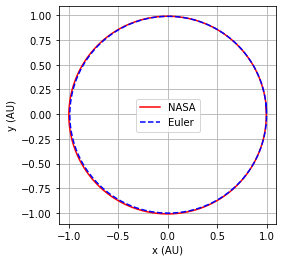

In [12]:
plt.figure()
plt.gca().set_aspect("equal") 

o1 = plt.plot(xNASA,yNASA,color = "red",label = "NASA")
o2 = plt.plot(x,y,"b--",label = "Euler")
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.legend()
plt.grid()
plt.show()